# The Sparks Foundation

# Data Science and Business Analytics Intern

# Task 2 : Prediction Using Unsupervised Machine Learning

# By -> Tushar Raj Sharma

# Importing Libraries

In [60]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection

In [61]:
# loading dataset into pandas dataframe
df = pd.read_csv("Iris.csv") 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
df.isnull().sum()  #null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
#duplicated values
df.duplicated().sum()

0

Text(0, 0.5, 'count')

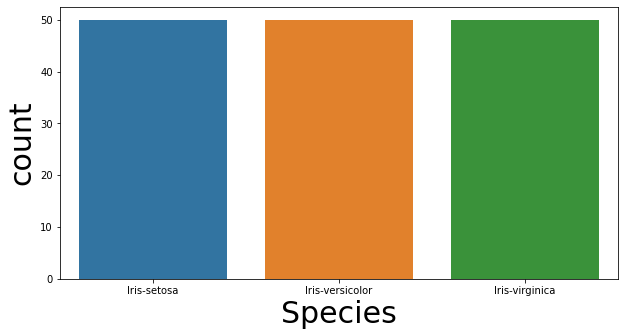

In [65]:
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(x='Species', data=df)
plt.xlabel('Species', fontsize=30)
plt.ylabel('count', fontsize=30)

In [66]:
#getting shape of dataset
df.shape

(150, 6)

In [67]:
#getting description of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [68]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualisation

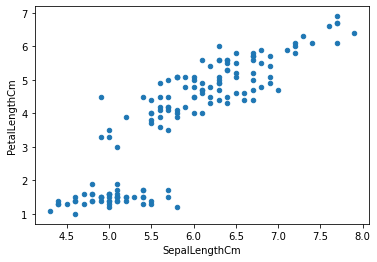

In [69]:
df.plot(kind = 'scatter', x = "SepalLengthCm", y = "PetalLengthCm" )
plt.show()

In [70]:
#dropping 2 columns "ID" and "Species" because they are irrelevant to us
df.drop(columns=["Id","Species"],axis=1,inplace=True)

# Optimum Number of Clusers are

In [71]:
#Kmeans clustering
sq_sum=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11): #for 10 clusters
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df) #To train the model and create classifier
    sq_sum.append(kmeans.inertia_) # To obtain the within cluster sum of square

In [72]:
sq_sum

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

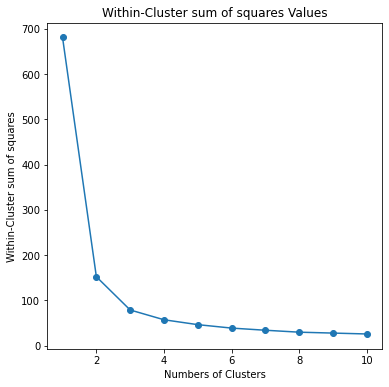

In [73]:
# plot the elbow graph to see which number of clusters has the minimum WCSS values
plt.figure(figsize=(6,6))
plt.plot(range(1,11),sq_sum,marker = 'o')
plt.title("Within-Cluster sum of squares Values")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.show()

# Model Training

In [74]:
# training the K-Means clustering model
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

# return a label for each data points based on their clusters
y_pred=kmeans.fit_predict(df)

In [75]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualisation of Clusters

Text(0.5, 1.0, 'K-Means Clustering of Iris Data')

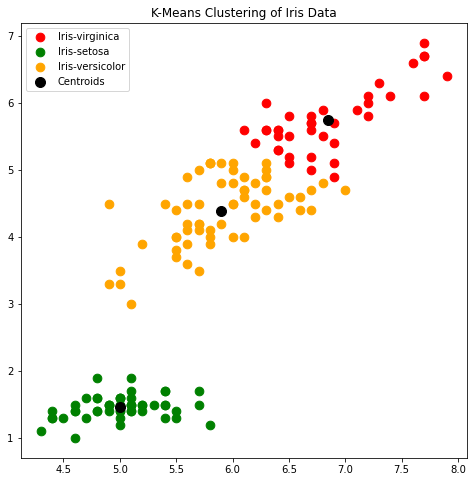

In [76]:
# plotting the datapoints and centroids
plt.figure(figsize=(8,8))
plt.scatter(df.iloc[y_pred==0,0],df.iloc[y_pred==0,2],s=75,c='red',label='Iris-virginica')
plt.scatter(df.iloc[y_pred==1,0],df.iloc[y_pred==1,2],s=75,c='green',label='Iris-setosa')
plt.scatter(df.iloc[y_pred==2,0],df.iloc[y_pred==2,2],s=75,c='orange',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.title('K-Means Clustering of Iris Data')

# Final Result

Thus, Optimum number of clusters is 3.